## HW1 BY WEILE CHEN
### Q1
We remove rows with NA value in salary for this question, as we will use other numeric variables to predict salary.

In [77]:
import numpy as np 
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 12})


'''
Read data, then keep numeric variables and drop na rows
'''
df = pd.read_csv("../input/Hitters.csv")
# df.dtypes
df = df.select_dtypes(include=['int64','float'])
# df.isna().sum()
df.dropna(inplace= True)
y = df.Salary.values
X = df.drop('Salary',axis=1)
nor_X = preprocessing.normalize(X)
df.head(5)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


#### Q1.1
Coefficient trajectories for Lasso with alphas from 0.01 to 10.

[-1318.08672369    -0.             0.             0.
    -0.            -0.            -0.           -25.46586317
     0.             0.             0.           715.81769173
     0.            -0.             0.            -0.        ]


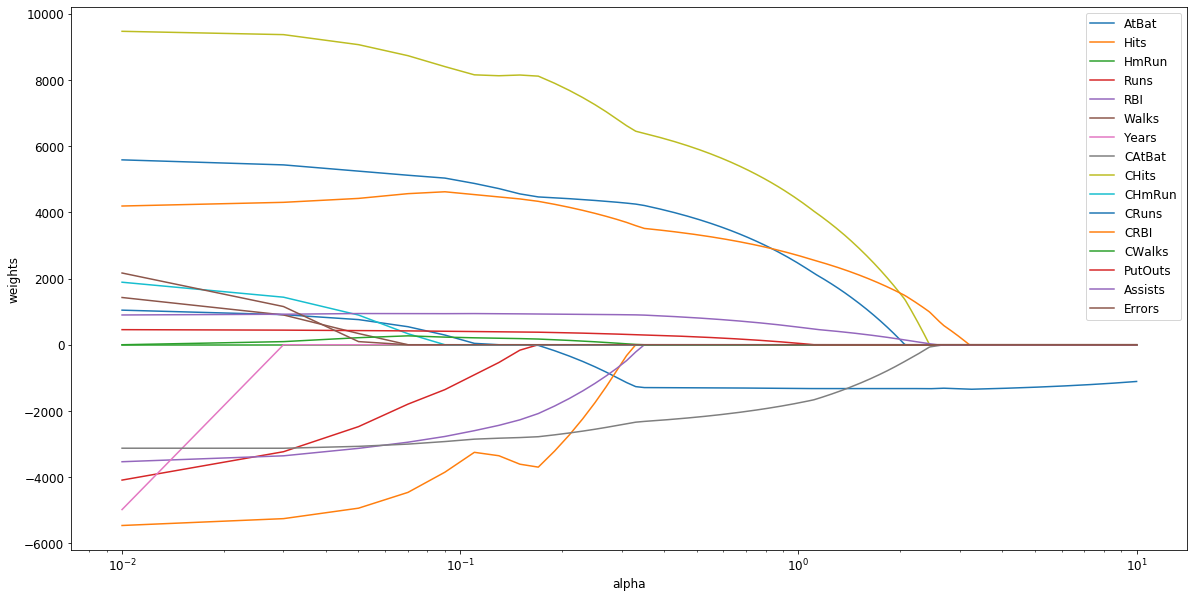

In [78]:
coefs = []
alphas = np.linspace(0.01,10,500)
for a in alphas:
    clf = Lasso(alpha=a)
    clf.fit(nor_X, y)
    coefs.append(clf.coef_)
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(X.columns,loc = 'upper right')

clf = Lasso(alpha=2.6)
clf.fit(normalized_X, y)
print(clf.coef_)

From the plot, we can see that the final three left predictors are AtBat, CRBI, and CAtBat.

In [100]:
lcv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = False)
lcv.fit(nor_X, y)
print('The optimal value of the regularization penalty for Lasso model is:',lcv.alpha_)
clf = linear_model.Lasso(alpha = lcv.alpha_)
clf.fit(nor_X, y)
#print(clf.coef_,X.columns)
print('The predictors left in the Lasso model with optimal alpha are:',X.columns[abs(clf.coef_)>1].values)

The optimal value of the regularization penalty for Lasso model is: 0.1371821429861081
The predictors left in the Lasso model with optimal alpha are: ['Hits' 'Runs' 'RBI' 'CAtBat' 'CHits' 'CRuns' 'CRBI' 'CWalks' 'PutOuts'
 'Assists']


#### Q1.2


[-938.19535543 -191.9248382    -8.15233776  -84.90918941  -72.04327194
  -61.8947998   -17.95008778  -63.14496818  313.34788186  113.02969646
  243.92025007  327.76253389  114.29175206  -99.98892606   36.53669297
  -23.44596541]


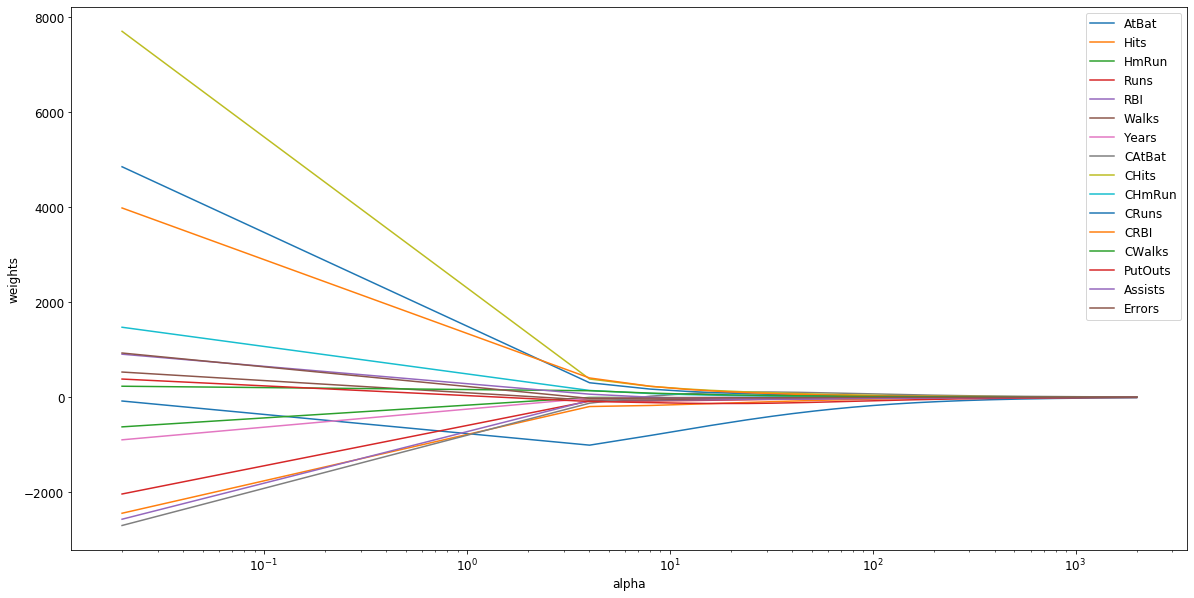

In [83]:
rf_coefs = []
alphas = np.linspace(0.01,1000,500)
for a in alphas:
    rf = Ridge(alpha=a)
    rf.fit(nor_X, y)
    rf_coefs.append(rf.coef_)
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.plot(alphas*2, rf_coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(X.columns,loc = 'upper right')

In [105]:
alphas = np.linspace(0.01,10,100)
rcv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
rcv.fit(nor_X, y)
print('The optimal value of the regularization penalty for Ridge model is:',rcv.alpha_)
rf = linear_model.Lasso(alpha = rcv.alpha_)
rf.fit(nor_X, y)

print('The predictors left in the ridge model with optimal alpha are:',X.columns[abs(rf.coef_)>1].values)

The optimal value of the regularization penalty for Ridge model is: 0.01
The predictors left in the ridge model with optimal alpha are: ['AtBat' 'Hits' 'Runs' 'RBI' 'Walks' 'Years' 'CAtBat' 'CHits' 'CHmRun'
 'CRuns' 'CRBI' 'PutOuts' 'Assists' 'Errors']


In [106]:
#X.corr()

### Q2
Bias is a quantitative term being used to describe how well a algorithm or model fit a training data set, while variance quantifies the sensitivity of a model reflects the fluctation of training data. High bias can render a model missing some important relationship between predictors and response which is also called underfitting, whereas high variance would let a model follow too close to random noise which is also called overfitting.

In question 1, we can note that when there is small penalty term, the coefficient would be large, which makes the model with high variance. However, when the penalty term is large, it would make the model with high bias. 